In [49]:
# 01 Import Library
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Import Data

In [50]:
df_ords_prods_customer_merge = pd.read_pickle(r'/Users/elenasharavara/Documents/08-2023 Instacart Grocery Basket Analysis /02 Data/Prepared Data/ords_prods_customer_merge_.pkl')

In [ ]:
path = r'/Users/elenasharavara/Documents/08-2023 Instacart Grocery Basket Analysis'

In [11]:
#checking rows and columns
df_ords_prods_customer_merge.shape

(32434212, 26)

In [4]:
#taking a look at the df 
df_ords_prods_customer_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0.1_y,...,loyalty_flag,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,195,...,New customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,195,...,New customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,195,...,New customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,195,...,New customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,195,...,New customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


# 03 Task Part 2

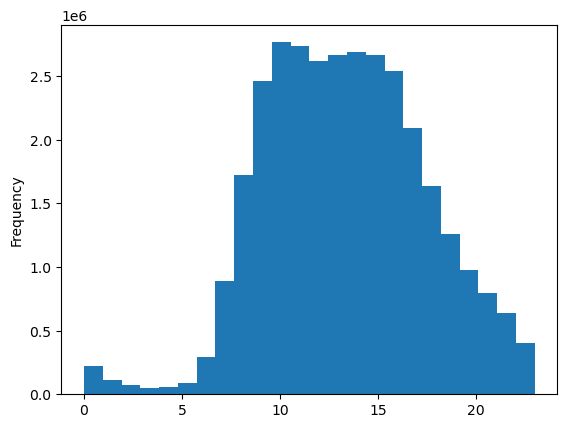

In [51]:
# creating a histogram for  order hour of day
hist_orders_hour_of_day = df_ords_prods_customer_merge['order_hour_of_day'].plot.hist(bins = 24)

### out histogram  shows that, the peak hours of ordering instacart are between 9AM and 4 PM and there is  a steady decline after 5 pm. a small little increase around midnight. but once again low until about 5/6am

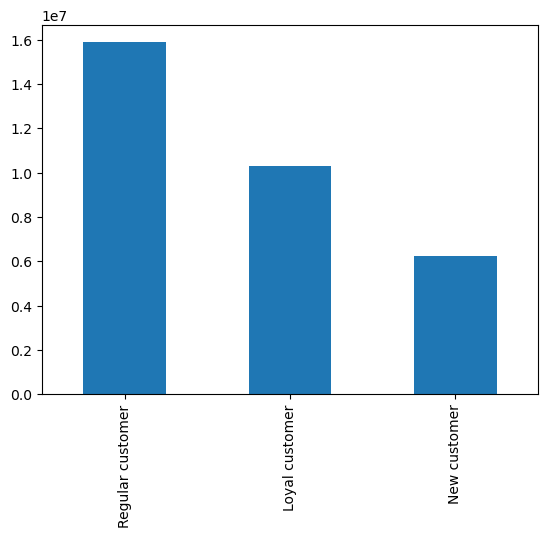

In [12]:
# bar chart for loyalty flag customers
bar_loyalty_flag = df_ords_prods_customer_merge['loyalty_flag'].value_counts().plot.bar()

## Regular Customers make up the most of the customers for InstaCart

In [13]:
# making a accurate subset for making a line chart for prices and order hour of day
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_customer_merge)) <= 0.7

In [14]:
dev

array([False,  True, False, ..., False,  True,  True])

In [15]:
# big is 70% of DF and small is 30%
big = df_ords_prods_customer_merge[dev]

In [16]:
# big is 70% of DF and small is 30%
small = df_ords_prods_customer_merge[~dev]

In [17]:
#checking the count of the whole DF
len(df_ords_prods_customer_merge)

32434212

In [18]:
# checking that the big and small data set = the same number 
len(big)+len (small)

32434212

In [19]:
# making the small df only contain 2 columns and renaming df_2
df_2 = small[['order_hour_of_day','prices']]

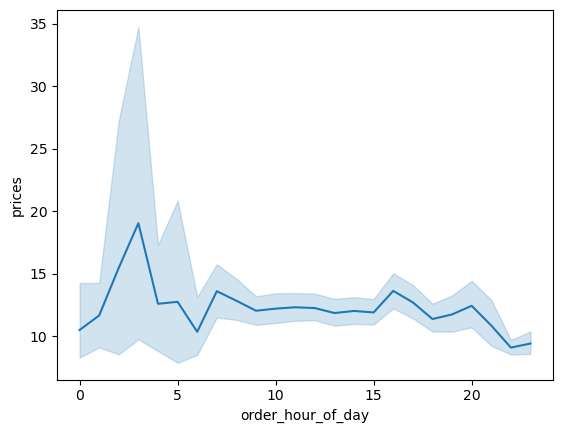

In [26]:
#5 making a line plot with the small df
line_hour_price = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

### there is no real relation to the price of items purchased and the hour of which they are purchased 

In [20]:
#looking at the column names
df_ords_prods_customer_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434212 entries, 0 to 32434211
Data columns (total 26 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 int64   
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              int64   
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   Unnamed: 0.1_y          int64   
 10  product_name            object  
 11  aisle_id                int64   
 12  department_id           int64   
 13  prices                  float64 
 14  _merge                  category
 15  max_order               int64   
 16  loyalty_flag            object  
 17  first_name              object  
 18  last_name               object  
 19  gender                  object  
 20  state                   object  
 21  age   

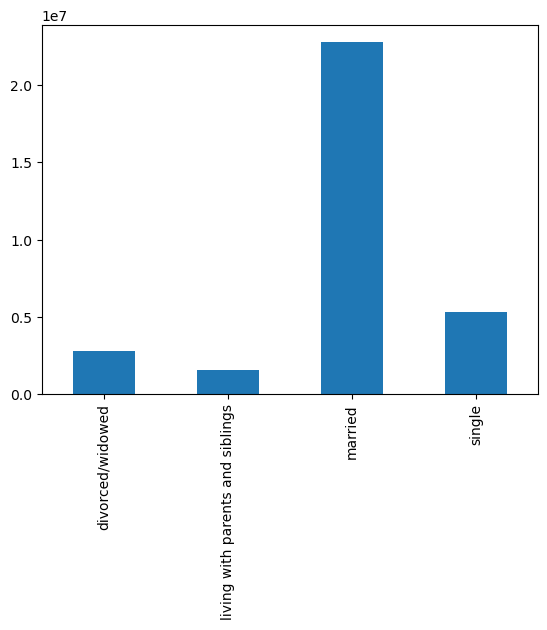

In [24]:
# bar chart for fam_status
bar_fam_status = df_ords_prods_customer_merge['fam_status'].value_counts().sort_index().plot.bar()

## married people are make up for the majority of instacart customers

In [27]:
# making age brackets flags column
df_ords_prods_customer_merge.loc[(df_ords_prods_customer_merge['age'] <= 89) & (df_ords_prods_customer_merge['age'] >= 80), 'age_bracket'] = '80-89'

In [28]:
df_ords_prods_customer_merge.loc[(df_ords_prods_customer_merge['age'] <= 79) & (df_ords_prods_customer_merge['age'] >= 70), 'age_bracket'] = '70-79'

In [29]:
df_ords_prods_customer_merge.loc[(df_ords_prods_customer_merge['age'] <= 69) & (df_ords_prods_customer_merge['age'] >= 60), 'age_bracket'] = '60-69'

In [30]:
df_ords_prods_customer_merge.loc[(df_ords_prods_customer_merge['age'] <= 59) & (df_ords_prods_customer_merge['age'] >= 50), 'age_bracket'] = '50-59'

In [31]:
df_ords_prods_customer_merge.loc[(df_ords_prods_customer_merge['age'] <= 49) & (df_ords_prods_customer_merge['age'] >= 40), 'age_bracket'] = '40-49'

In [32]:
df_ords_prods_customer_merge.loc[(df_ords_prods_customer_merge['age'] <= 39) & (df_ords_prods_customer_merge['age'] >= 30), 'age_bracket'] = '30-39'

In [33]:
df_ords_prods_customer_merge.loc[(df_ords_prods_customer_merge['age'] <= 29) & (df_ords_prods_customer_merge['age'] >= 20), 'age_bracket'] = '20-29'

In [34]:
df_ords_prods_customer_merge.loc[(df_ords_prods_customer_merge['age'] <= 19) & (df_ords_prods_customer_merge['age'] >= 10), 'age_bracket'] = '10-19'

In [35]:
#checking the count for the age brackets of IC customers
df_ords_prods_customer_merge['age_bracket'].value_counts(dropna = False)

40-49    5113807
30-39    5078053
20-29    5075049
50-59    5069098
70-79    5059735
60-69    4992031
80-89    1025384
10-19    1021055
Name: age_bracket, dtype: int64

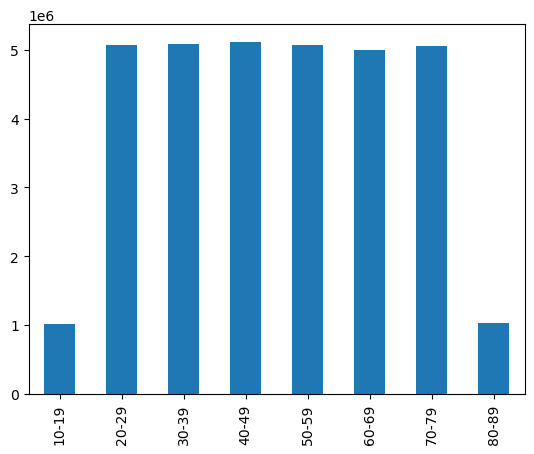

In [37]:
#bar chart on customers age bracket
bar_age_bracket = df_ords_prods_customer_merge['age_bracket'].value_counts().sort_index().plot.bar()

### The 80-89 and 10-19 years old age groups customers are buying less than that the others

In [38]:
#taking a look at the DF
df_ords_prods_customer_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0.1_y,...,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,age_bracket
0,2539329,1,1,2,8,NaN,196,1,0,195,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,30-39
1,2398795,1,2,3,7,15.0,196,1,1,195,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,30-39
2,473747,1,3,3,12,21.0,196,1,1,195,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,30-39
3,2254736,1,4,4,7,29.0,196,1,1,195,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,30-39
4,431534,1,5,4,15,28.0,196,1,1,195,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,30-39


In [39]:
#making a new df with just 2 columns in the small subset
df_3 = small[['gender','age']]



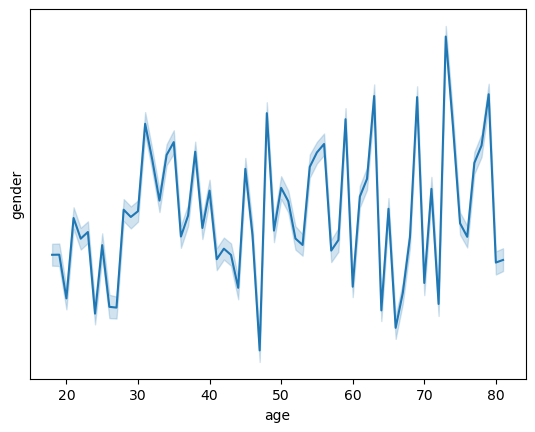

In [40]:
# line chart exploring age and gender
line_age_gender = sns.lineplot(data = df_3, x = 'age',y = 'gender')

### our line chart shows that, there is no connection between age and gender

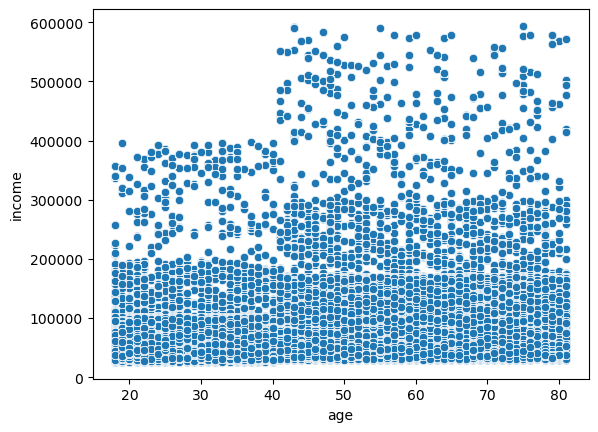

In [48]:
# scatterplot of age and income
scatter_age_income = sns.scatterplot(x = 'age', y = 'income',data = df_ords_prods_customer_merge)

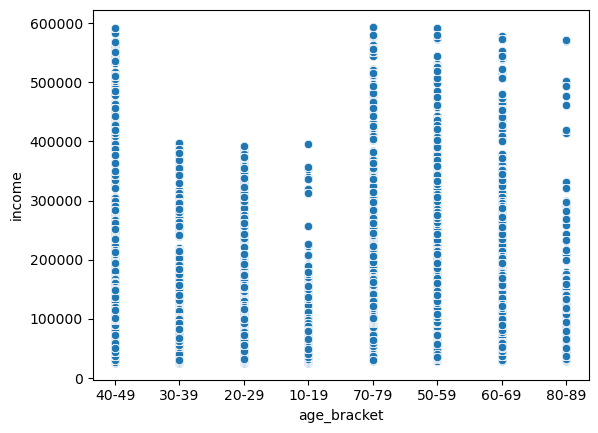

In [49]:
# scatterplot of age and income
scatter_age_bracket_income = sns.scatterplot(x = 'age_bracket', y = 'income',data = df_ords_prods_all)

### out scatterplot shows that  40+ years old  age categories of customers have  a higher income. 

In [ ]:
# saving all visualizations in Jupyter folder

In [52]:
hist_orders_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_hour_of_day.png'))

In [53]:
bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [54]:
line_hour_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_hour_price.png'))

In [55]:
bar_fam_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_fam_status.png'))

In [56]:
bar_age_bracket.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_bracket.png'))

In [57]:
line_age_gender.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_gender.png'))

In [58]:
scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))

In [ ]:
scatter_age_bracket_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_bracket_income.png'))